Nome: Daniel Oliveira dos Santos            
Matrícula: 564307         
Nível: Mestrado              
Email: danieloliveirafff@gmail.com          
Área: Ciência da Computação         
GitHub: https://github.com/Danieloliver1               
Primeiro Exercício.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
link_artificial1d = r'https://raw.githubusercontent.com/Danieloliver1/UFC_mestrado/main/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_01_ama/artificial1d.csv?token=GHSAT0AAAAAACPK6ODCASMCAGSNVYGIQDF6ZPMUW4Q'

In [ ]:

dados = np.genfromtxt(link_artificial1d, delimiter=',') # numpy

In [ ]:
dados.shape

(30, 2)

In [ ]:
# passando os valore de x
# Selecionando todas as colunas exceto a última
x = dados[:,:-1]

# passando os valore de y
# Pegando somente a última coluna
y = dados[:, -1]

##**Questão 1**

##Considere o conjunto de dados disponível em articial1d.csv organizado em
##duas colunas, x e y.                                                          Seja um modelo de regressão linear para yˆ = f(x).


##a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio)
##obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote
##a reta resultante sobre os dados.

![regressao_linear](https://www.alura.com.br/artigos/assets/desvendando-a-regressao-linear/imagem4.png)




In [ ]:
# Adicionando termo de bias 1s para X a primeira coluna para ter valores 1
X_b = np.c_[np.ones(len(x)), x.reshape(-1, 1)]

In [ ]:
# Função para calcular (Erro quadrático médio) (MSE)
def raiz_erro_quadratico_medio(y, y_pred):
    """
    Calcula o erro quadrático médio

    Parâmetros:
    - y: vetor de saída
    - y_pred: vetor de previsão do y

    Retorna:
    - MSE: vetor calculado erro quadrático médio
    """
    if len(y) == 0:
        return None
    MSE = ((y- y_pred) ** 2).sum() / len(y)

    return MSE

In [ ]:
def regressao_ols(x, y):
    """
    Calcula os parâmetros do modelo de regressão linear utilizando a equação normal.

    Parâmetros:
    - x: matriz de características
    - y: vetor de saída

    Retorna:
    - theta: vetor de parâmetros do modelo
    """

    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(x[:, 0] == 1):
        matriz_x = x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Calcular os parâmetros do modelo de regressão linear
    matriz_x_transposta = matriz_x.T
    produto_matriz = matriz_x_transposta @ matriz_x
    inverso_da_matriz = np.linalg.inv(produto_matriz)
    theta = inverso_da_matriz @ matriz_x_transposta @ y
    return theta


In [ ]:
# Função para calcular o y_previsto

def y_previsto(x,y):
  """
  Calcula o y previsto usando (mínimos quadrados ordinários).ols e enseguida o erro quadrático médio assim calculando o y previsto.

    Parâmetros:
    - x: matriz de características
    - y: vetor de saída

    Retorna:
    - y_previsto: valor de saída y ajustado
    - theta_ols[0]: coeficiente linear, (intercept)
    - theta_ols[1]: coeficiente de ajuste.
  """

    # Verificar se a primeira coluna de x é composta por 1s
  if np.all(x[:, 0] == 1):
      matriz_x = x
  else:
      # Adicionando a primeira coluna de 1s à matriz de características
      matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))


  theta_ols = regressao_ols(x, y)
  # Calculando as previsões do modelo
  y_previsto = matriz_x @ theta_ols

  mse = raiz_erro_quadratico_medio(y, y_previsto)

  return y_previsto , theta_ols[0],theta_ols[1], mse

In [ ]:
y_previsto, intercepto, coeficientes, mse = y_previsto(x,y)

In [ ]:
print("Parâmetros do modelo OLS:")
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("MSE:", mse)

Parâmetros do modelo OLS:
Coeficientes: 1.5748651690368314
Intercepto: 0.06761792463834031
MSE: 0.21340090132936987


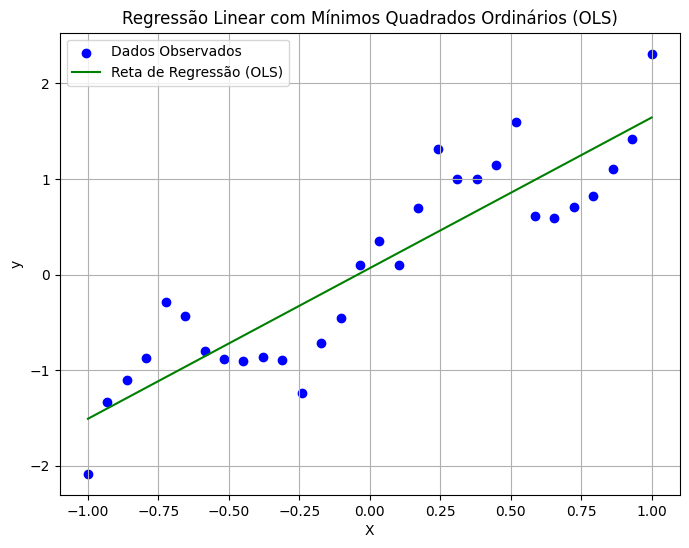

In [ ]:
# Plotando os dados e a reta resultante
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Dados Observados')
plt.plot(x, y_previsto, color='g', label='Reta de Regressão (OLS)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com Mínimos Quadrados Ordinários (OLS)')
plt.legend()
plt.grid(True)
plt.show()

#b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem

#obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [ ]:
# Definindo taxa de aprendizado e o número de iterações
taxa_de_aprendizado = 0.01
interacoes = 500

In [ ]:
# Inicializando os parâmetros aleatórios
#teta = np.random.randn(2,1)
theta = np.array([0, 0])  # Theta inicial
theta

array([0, 0])

In [1]:
def gradiente_descendente(X, y, theta, taxa_de_aprendizado, interacoes):
    """
    Calcula os parâmetros do modelo de regressão linear utilizando gradiente descendente.

    Parâmetros:
    - X: matriz de características (com a coluna de 1s adicionada)
    - y: vetor de saída
    - theta: vetor de parâmetros do modelo inicial
    - taxa_de_aprendizado: taxa de aprendizado do algoritmo de gradiente descendente
    - interacoes: número de iterações do algoritmo

    Retorna:
    - theta: vetor de parâmetros do modelo atualizados
    - custo: vetor de custos a cada iteração
    - theta_interacoes: matriz contendo os parâmetros theta a cada iteração
    - y_previsto: valor de saída y ajustado
    """


        # Verificar se a primeira coluna de x é composta por 1s
    if np.all(X[:, 0] == 1):
        matriz_x = X
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((X.shape[0], 1)), x))


    m = len(y)  # Número de exemplos de treinamento
    custo = np.zeros(interacoes)  # Inicializa um array para armazenar o histórico de custos durante as iterações
    theta_interacoes = np.zeros((interacoes, len(theta)))  # Inicializa um array para armazenar o histórico de parâmetros theta durante as iterações

    for i in range(interacoes):
        # Calcula o gradiente da função de custo em relação aos parâmetros theta
        gradiente = (1/m) * matriz_x.T.dot(matriz_x.dot(theta) - y)

        # Atualiza os parâmetros theta usando o gradiente descendente
        theta = theta - (taxa_de_aprendizado * gradiente)

        # Calcula o custo após a atualização dos parâmetros e armazena no histórico de custos
        y_pred = matriz_x.dot(theta)  # Calcula as previsões do modelo
        custo[i] = raiz_erro_quadratico_medio(y, y_pred)

        # Armazena os parâmetros theta atualizados no histórico
        theta_interacoes[i] = theta

    return theta, custo, theta_interacoes, y_pred



In [ ]:
teta_final, custo, teta_de_todas_interecoes, y_previsto_final = gradiente_descendente(x, y, theta, taxa_de_aprendizado,interacoes)

print("Parâmetros do modelo:")
print("Coeficientes:", teta_final[1])
print("Intercepto:", teta_final[0])
print("MSE:", custo[-1])

Parâmetros do modelo:
Coeficientes: 1.310552156697094
Intercepto: 0.06717364221114075
MSE: 0.2382942300180299


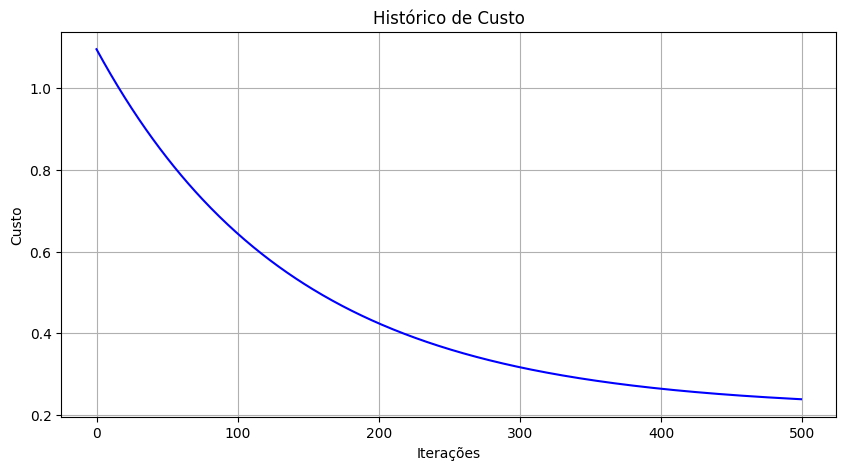

In [ ]:
# Oo histórico de custo
plt.figure(figsize=(10, 5))
plt.plot(range(interacoes), custo, color='blue')
plt.title('Histórico de Custo')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.grid(True)
plt.show()


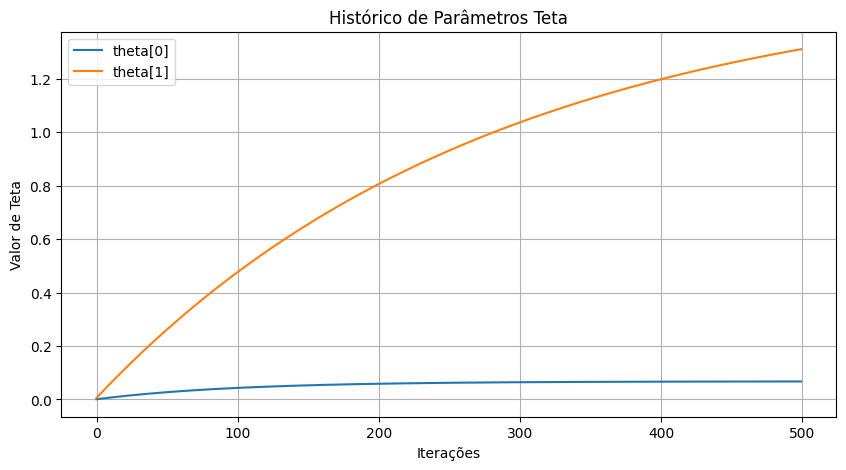

In [ ]:
# Plotar o histórico de parâmetros theta
plt.figure(figsize=(10, 5))
for i in range(len(theta)):
    plt.plot(range(interacoes), teta_de_todas_interecoes[:, i], label=f'theta[{i}]')
plt.title('Histórico de Parâmetros Teta')
plt.xlabel('Iterações')
plt.ylabel('Valor de Teta')
plt.legend()
plt.grid(True)
plt.show()

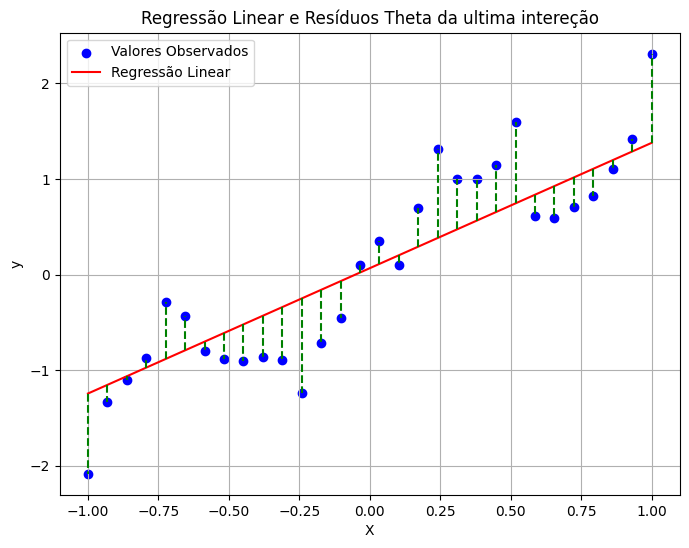

In [ ]:
# Plotar os dados e a reta de regressão linear
plt.figure(figsize=(8,6))


# Plotando os pontos (valores observados)
plt.scatter(x, y, color='blue', label='Valores Observados')

# Plotando a linha de regressão
plt.plot(x, y_previsto_final, color='red', label='Regressão Linear')

# Plotando as diferenças (resíduos) como linhas pontilhadas
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_previsto_final[i], y[i]], color='green', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear e Resíduos Theta da ultima intereção')
plt.legend()
plt.grid(True)
plt.show()

##c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem                                        
##obtidos pelo algoritmo SGD (gradiente descendente estocástico).
##Plote a reta resultante sobre os dados.             

In [ ]:

def gradiente_estocastico(X, y, theta, taxa_de_aprendizado, interacoes):
    """
    Calcula os parâmetros do modelo de regressão linear utilizando gradiente estocástico.

    Parâmetros:
    - X: matriz de características (com a coluna de 1s adicionada)
    - y: vetor de saída
    - theta: vetor de parâmetros do modelo inicial
    - taxa_de_aprendizado: taxa de aprendizado do algoritmo de gradiente estocástico
    - interacoes: número de iterações do algoritmo

    Retorna:
    - theta: vetor de parâmetros do modelo atualizados
    - custo: vetor de custos a cada iteração
    - theta_interacoes: matriz contendo os parâmetros theta a cada iteração
    - y_previsto: valor de saída y ajustado
    - custo_history: amazena em uma array custo de cada intereções
    """

    custo_history = []  # Lista para armazenar o histórico de custos

    # Verificar se a primeira coluna de X é composta por 1s
    if np.all(X[:, 0] == 1):
        matriz_x = X
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((X.shape[0], 1)), X))

    m = len(y)  # Número de exemplos de treinamento
    custo = np.zeros(interacoes)  # Inicializa um array para armazenar o histórico de custos durante as iterações
    theta_interacoes = np.zeros((interacoes, len(theta)))  # Inicializa um array para armazenar o histórico de parâmetros theta durante as iterações

    np.random.seed(42) # definindo uma semente aletária.
    # Loop de iterações
    for i in range(interacoes):
        # Escolhe um exemplo de treinamento aleatoriamente
        idx = np.random.randint(m)
        X_exemplo = matriz_x[idx:idx+1]
        y_exemplo = y[idx:idx+1]

        # Calcula o gradiente da função de custo em relação aos parâmetros theta
        gradiente = X_exemplo.T.dot(X_exemplo.dot(theta) - y_exemplo)

        # Atualiza os parâmetros theta usando o gradiente estocástico
        theta = theta - (taxa_de_aprendizado * gradiente)

        # Calcula o custo após a atualização dos parâmetros e armazena no histórico de custos
        y_pred = matriz_x.dot(theta)  # Calcula as previsões do modelo
        custo[i] = raiz_erro_quadratico_medio(y, y_pred)
        custo_history.append(custo)

        # Armazena os parâmetros theta atualizados no histórico
        theta_interacoes[i] = theta

    return theta, custo, theta_interacoes, y_pred, custo_history


In [ ]:
theta_final_com_estocastico, custo, theta_interacoes, y_previsto_final_estocastico, custo_history = gradiente_estocastico(x, y,theta, taxa_de_aprendizado,interacoes)

print("Parâmetros do modelo:")
print("Coeficientes:", theta_final_com_estocastico[1])
print("Intercepto:", theta_final_com_estocastico[0])
print("MSE:", custo[-1])

# esses valores vão alterando de acordo que execultar a celula pois os dados estão aleatório

Parâmetros do modelo:
Coeficientes: 1.4027101000639228
Intercepto: 0.07622716080764436
MSE: 0.22403546166719185


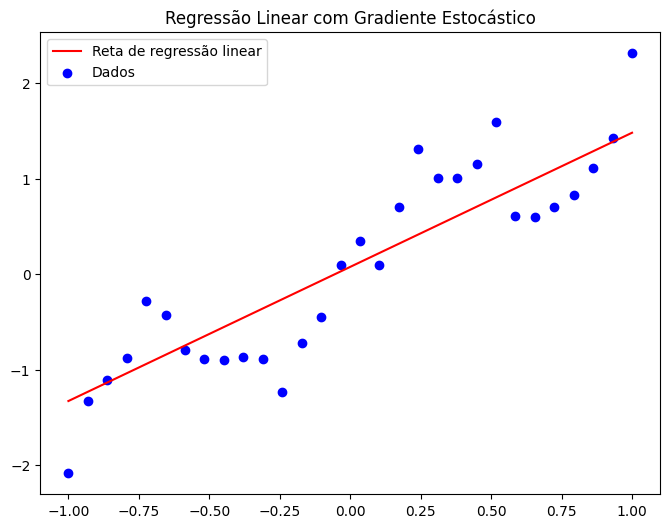

In [ ]:
# Plotar os dados e a reta de regressão linear
plt.figure(figsize=(8,6))

# Plotar a reta de regressão linear
plt.plot(x, y_previsto_final_estocastico, color='red', label='Reta de regressão linear')

# Plotar os dados de dispersão (pontos)
plt.scatter(x, y , color='blue', label='Dados')


# Adicionar título ao gráfico
plt.title('Regressão Linear com Gradiente Estocástico')

# Exibir a legenda
plt.legend()
# Exibir o gráfico

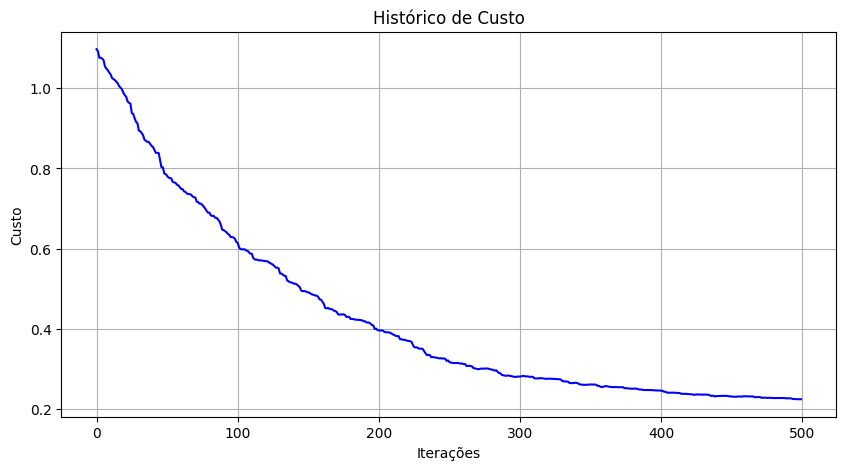

In [ ]:
#Plotar o gráfico do histórico de custo da ultima interação


# Oo histórico de custo
plt.figure(figsize=(10, 5))
plt.plot(range(interacoes), custo_history[-1], color='blue')
plt.title('Histórico de Custo')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.grid(True)
plt.show()

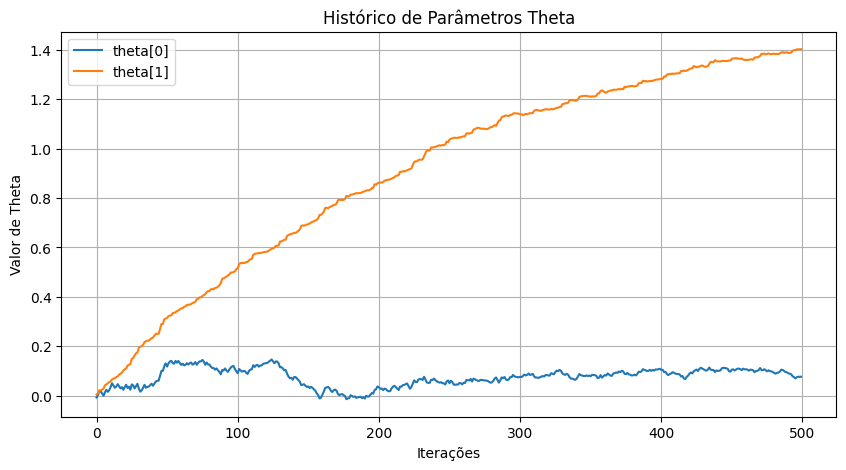

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(len(theta)):
    plt.plot(range(interacoes), theta_interacoes[:, i], label=f'theta[{i}]')
plt.title('Histórico de Parâmetros Theta')
plt.xlabel('Iterações')
plt.ylabel('Valor de Theta')
plt.legend()
plt.grid(True)
plt.show()